In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir('/Users/divine/Documents/MBS /PGE 2 /S2/Finance appliquée avec Python /Rapport/2021:2022') 

In [5]:
df = pd.read_excel('NDAQ 2021.xlsx')

In [6]:
print(df)

          Date        META     NASDAQ
0   2021-01-04  268.654968  42.049213
1   2021-01-05  270.682800  42.036465
2   2021-01-06  263.030914  43.129025
3   2021-01-07  268.455170  43.574966
4   2021-01-08  267.286407  44.215218
..         ...         ...        ...
498 2022-12-23  117.914894  60.059288
499 2022-12-27  116.756119  59.765259
500 2022-12-28  115.497459  59.490841
501 2022-12-29  120.132538  60.637527
502 2022-12-30  120.212448  60.127888

[503 rows x 3 columns]


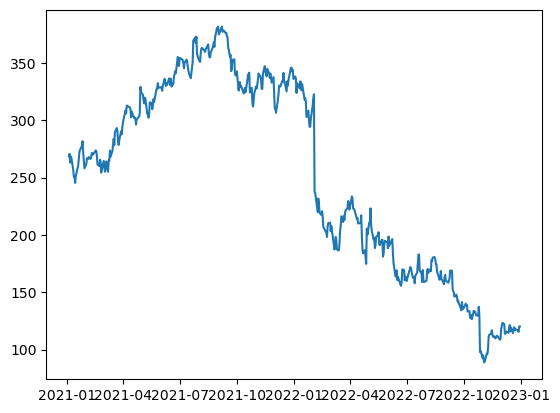

In [7]:
plt.plot(df['Date'], df['META']) 

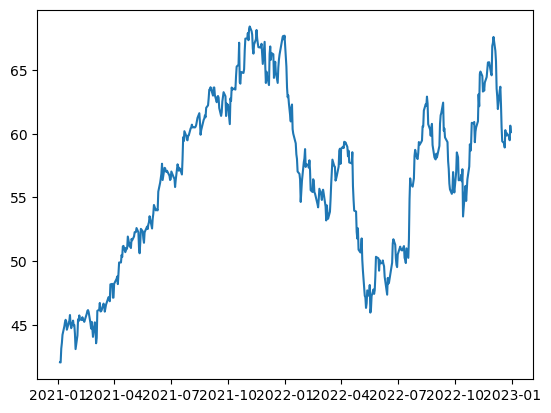

In [8]:
plt.plot(df['Date'], df['NASDAQ'])

In [9]:
meta = df['META']
nasdaq = df['NASDAQ']

In [10]:
meta_daily_returns = meta.pct_change()

In [11]:
nasdaq_daily_returns = nasdaq.pct_change()

In [12]:
meta_daily_returns.mean()*252

-0.27203999231524006

In [13]:
nasdaq_daily_returns.mean()*252

0.20821852746996086

In [14]:
meta_daily_returns.std()*252**0.5

0.5008556318801559

In [15]:
nasdaq_daily_returns.std()*252**0.5

0.23939344332419366

In [16]:
clean_meta_daily_returns = meta_daily_returns.dropna(axis=0)
clean_nasdaq_daily_returns = nasdaq_daily_returns.dropna(axis=0)

In [17]:
data = np.array([clean_meta_daily_returns,clean_nasdaq_daily_returns])

In [18]:
covMatrix = np.cov(data,bias=True)
print(covMatrix)

[[0.00099348 0.00020938]
 [0.00020938 0.00022696]]


In [19]:
beta = covMatrix[0] [1] / covMatrix[1] [1]
print(beta)

0.9225097415184129


In [20]:
import os
os.chdir('/Users/divine/Documents/MBS /PGE 2 /S2/Finance appliquée avec Python /Rapport/2021:2022') 

In [21]:
data = pd.read_excel('META2021.xlsx')

In [22]:
data.head()

,Date,META,NVIDIA,ALPHABET INC.,MICROSOFT,BAIDU
0,2021-01-04,268.654968,130.833954,86.412003,211.605286,176.399994
1,2021-01-05,270.682800,133.739792,87.045998,211.809448,174.800003
2,2021-01-06,263.030914,125.855415,86.764503,206.317368,171.800003
3,2021-01-07,268.455170,133.133682,89.362503,212.188538,170.000000
4,2021-01-08,267.286407,132.462723,90.360497,213.481369,191.000000


In [23]:
stocks = data.drop(columns=["Date"])
stocks.head()

,META,NVIDIA,ALPHABET INC.,MICROSOFT,BAIDU
0,268.654968,130.833954,86.412003,211.605286,176.399994
1,270.682800,133.739792,87.045998,211.809448,174.800003
2,263.030914,125.855415,86.764503,206.317368,171.800003
3,268.455170,133.133682,89.362503,212.188538,170.000000
4,267.286407,132.462723,90.360497,213.481369,191.000000


In [24]:
stock_normed = stocks/stocks.iloc[0]

<Axes: >

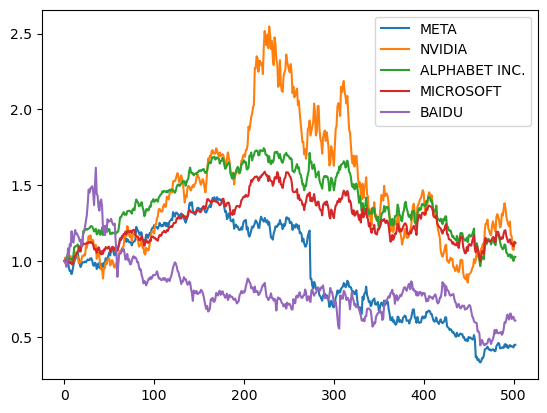

In [25]:
stock_normed.plot()

In [26]:
log_ret = np.log(stocks/stocks.shift(1))

In [27]:
log_ret.mean() * 252

META            -0.403686
NVIDIA           0.055292
ALPHABET INC.    0.013288
MICROSOFT        0.057473
BAIDU           -0.250959
dtype: float64

In [28]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
META,502.0,-0.001602,0.032776,-0.306391,-0.013486,-0.000310,0.014581,0.162064
NVIDIA,502.0,0.000219,0.034583,-0.099518,-0.020369,0.001376,0.020590,0.133913
ALPHABET INC.,502.0,0.000053,0.020306,-0.101313,-0.009954,0.000720,0.010154,0.074606
MICROSOFT,502.0,0.000228,0.018335,-0.080295,-0.009206,-0.000084,0.011290,0.079059
BAIDU,502.0,-0.000996,0.039350,-0.165775,-0.022895,0.000000,0.018669,0.333690


In [29]:
log_ret.cov()

,META,NVIDIA,ALPHABET INC.,MICROSOFT,BAIDU
META,0.001074,0.000611,0.000425,0.000352,0.000051
NVIDIA,0.000611,0.001196,0.000479,0.000462,0.000027
ALPHABET INC.,0.000425,0.000479,0.000412,0.000302,0.000021
MICROSOFT,0.000352,0.000462,0.000302,0.000336,-0.000002
BAIDU,0.000051,0.000027,0.000021,-0.000002,0.001548


In [30]:
log_ret.corr()
print(log_ret.corr())

                   META    NVIDIA  ALPHABET INC.  MICROSOFT     BAIDU
META           1.000000  0.538802       0.638188   0.585666  0.039530
NVIDIA         0.538802  1.000000       0.681950   0.728488  0.020084
ALPHABET INC.  0.638188  0.681950       1.000000   0.811912  0.026548
MICROSOFT      0.585666  0.728488       0.811912   1.000000 -0.003158
BAIDU          0.039530  0.020084       0.026548  -0.003158  1.000000


In [31]:
num_ports = 15000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
nb_assets = stocks.shape[1] 

In [32]:
for ind in range(num_ports):
    weights = np.array(np.random.random(nb_assets))             
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [33]:
sharpe_arr.max()
optimal = sharpe_arr.argmax()
print(optimal)

4636


In [34]:
optimal_pf = all_weights[optimal,:] 
o_w = optimal_pf.tolist() 
weights_sim = dict(zip(stocks, o_w))

In [35]:
optimal_weights = pd.DataFrame.from_dict(weights_sim, orient='index', columns=['Weight in %'])
optimal_weights = optimal_weights*100
optimal_weights = optimal_weights.round(decimals = 2)
optimal_weights = optimal_weights.sort_values(by=['Weight in %'], ascending = False)
optimal_weights

,Weight in %
MICROSOFT,65.45
NVIDIA,19.06
ALPHABET INC.,13.01
BAIDU,2.38
META,0.10


In [36]:
max_sr_ret = ret_arr[optimal]
max_sr_vol = vol_arr[optimal]
max_sr = sharpe_arr[optimal]

In [37]:
print('La rentabilité du portefeuille optimal est',max_sr_ret*100,'%')
print('La volatilité du portefeuille optimal est',max_sr_vol*100,'%')
print('Le ratio de Sharpe du portefeuille optimal est',max_sr)

La rentabilité du portefeuille optimal est 4.349397649445135 %
La volatilité du portefeuille optimal est 31.22392546629376 %
Le ratio de Sharpe du portefeuille optimal est 0.13929695208055473


Text(0, 0.5, 'Return')

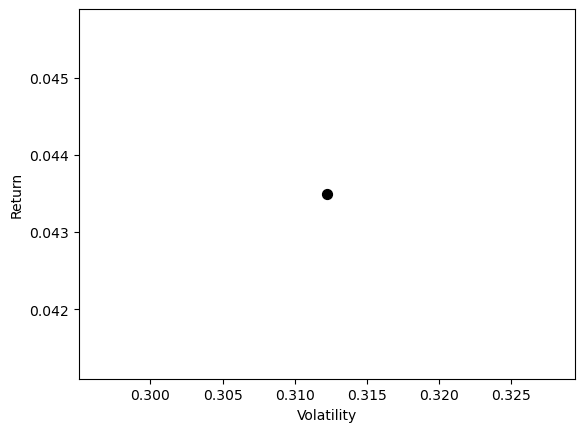

In [38]:
plt.scatter(max_sr_vol,max_sr_ret,c='black',s=50,edgecolors='black')
plt.xlabel('Volatility')
plt.ylabel('Return')

Text(0, 0.5, 'Return')

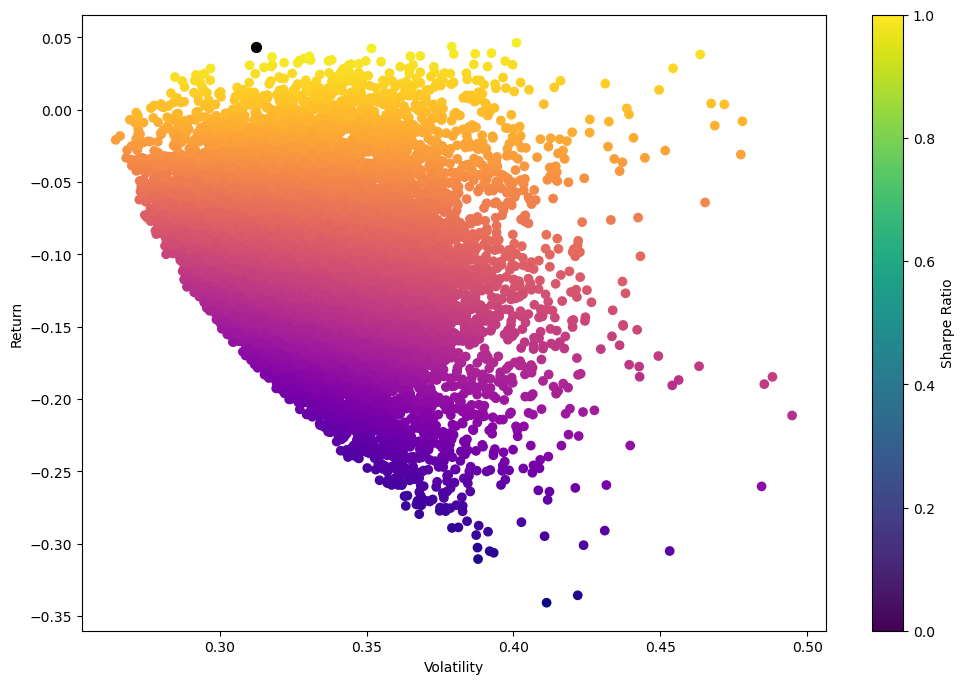

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.scatter(max_sr_vol,max_sr_ret,c='black',s=50,edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [ ]:
### Key Takeaways

- Monte Carlo simulations show a wider dispersion of outcomes, consistent with a higher-volatility regime compared to the prior period.
- The Sharpe-optimal portfolio (black marker) sits on the efficient set, delivering the best expected return per unit of risk among simulated allocations.
- Efficient frontier analysis confirms that allocation choices materially impact risk-adjusted performance, with diminishing return improvements at higher volatility levels.